# Diamond Price Prediction 

# Problem Statement

The objective of this project is to develop a predictive model that accurately estimates the price of diamonds based on their various features. The dataset contains information about diamonds, including their carat, cut, color, clarity, and dimensions. The goal is to build a machine learning model that can take these features as input and predict the price of diamonds with a high level of accuracy. This model will assist jewelers, buyers, and sellers in determining the appropriate price range for diamonds based on their characteristics, enabling them to make informed decisions during transactions.

The project will involve data preprocessing, exploratory data analysis, feature engineering, and the development and evaluation of predictive models. The model's performance will be assessed using appropriate evaluation metrics, such as root mean squared error or mean absolute percentage error, to measure the accuracy of the price predictions.

The successful completion of this project will provide a valuable tool for the diamond industry, facilitating pricing decisions and improving transparency in the market.

# Importing relevant libraries

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import plotly.express as px 
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.metrics import SCORERS

In [201]:
# uploading the data set

df = pd.read_csv("Diamond.csv")

In [202]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Data Description

Content and meaning of each column in the data is as below:

price - diamond price in US dollars and target variable (continuous)

carat - weight of the diamond (continuous)

cut - quality of cut (categorical)

color - diamond color (categorical)

clarity - measure of flawless or how clear the diamond is (categorical)

depth - total depth percentage estimated by formulas (continuous)

table - width of top of the diamond relative to widest point (continuous)

x - lenghth in mm (continuous)

y - width in mm (continuous)

z - depth in mm (continuous)


# Exploratory Data Analysis

In [203]:
#checking first five rows of the data set

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [204]:
#checking last 5 rows of the data set

df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [205]:
#checking the shape

df.shape

(53940, 10)

There are total 53,940 rows and 10 columns in the data set

In [206]:
#checking information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [207]:
#getting data's description

df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [208]:
#all the columns present in the data set

df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [209]:
#all data types

df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [210]:
#Checking for duplicates

df.loc[df.duplicated(keep='first')]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


We can see 146 duplicate rows

In [211]:
#Removing duplicate rows

df = df.drop_duplicates()

In [212]:
df.shape

(53794, 10)

We can see we have dropped 146 rows

In [213]:
#dividing data into categorical and numerical

X_num = df.select_dtypes(include = np.number)
X_cat = df.select_dtypes(exclude = np.number)

In [214]:
#checking counts of the values

X_cat.value_counts

<bound method DataFrame.value_counts of              cut color clarity
0          Ideal     E     SI2
1        Premium     E     SI1
2           Good     E     VS1
3        Premium     I     VS2
4           Good     J     SI2
...          ...   ...     ...
53935      Ideal     D     SI1
53936       Good     D     SI1
53937  Very Good     D     SI1
53938    Premium     H     SI2
53939      Ideal     D     SI2

[53794 rows x 3 columns]>

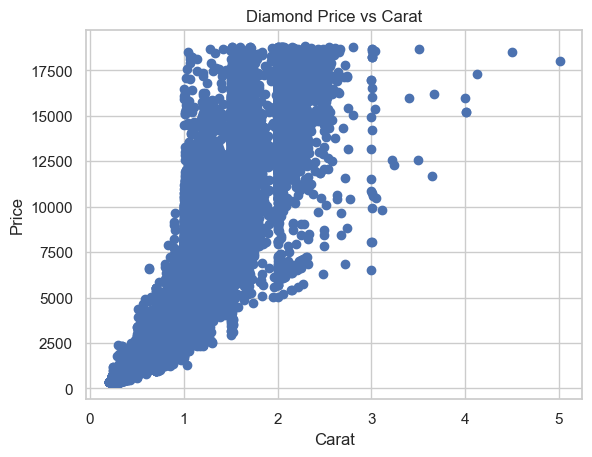

In [215]:
# Extract the carat and price columns
carat = df['carat']
price = df['price']

# Create scatter plot
plt.scatter(carat, price)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Diamond Price vs Carat')
plt.show()


From the scatter plot, we can see the data points tend to form an upward-sloping pattern, it suggests a positive correlation between carat and price. This means that as the carat weight of a diamond increases, the price tends to increase as well.

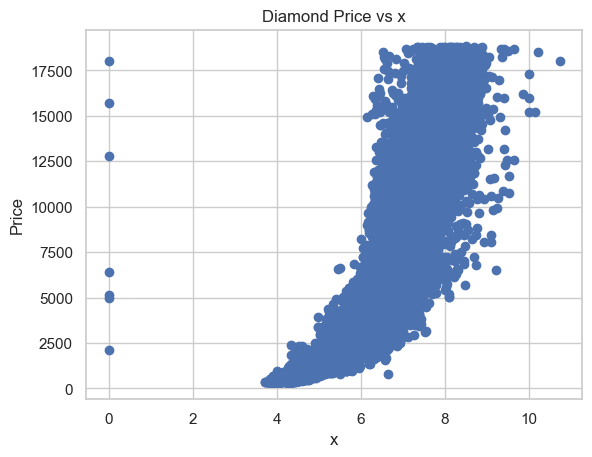

In [216]:
x = df['x']
price = df['price']
# Create scatter plot
plt.scatter(x, price)
plt.xlabel('x')
plt.ylabel('Price')
plt.title('Diamond Price vs x')
plt.show()

 There is a positive correlation between x and price. This means that as x of a diamond increases, the price tends to increase as well.

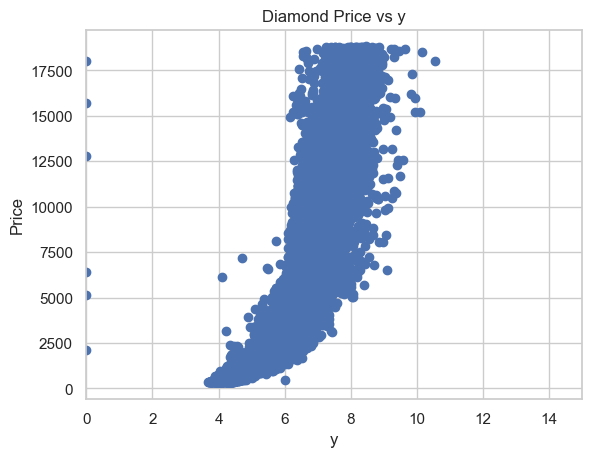

In [217]:
y = df['y']
price = df['price']

# Create scatter plot
plt.scatter(y, price)
plt.xlabel('y')
plt.ylabel('Price')
plt.title('Diamond Price vs y')

plt.xlim(0, 15)


plt.show()


There is a positive correlation between y and price. This means that as y of a diamond increases, the price tends to increase as well.

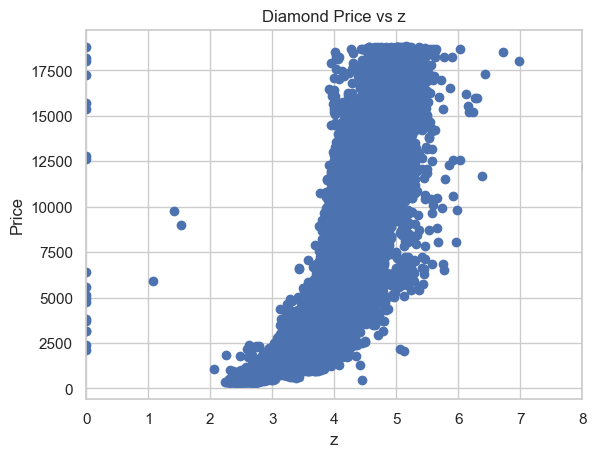

In [218]:
z = df['z']
price = df['price']
# Create scatter plot
plt.scatter(z, price)
plt.xlabel('z')
plt.ylabel('Price')
plt.title('Diamond Price vs z')
plt.xlim(0, 8)
plt.show()

There is a positive correlation between z and price. This means that as z of a diamond increases, the price tends to increase as well.

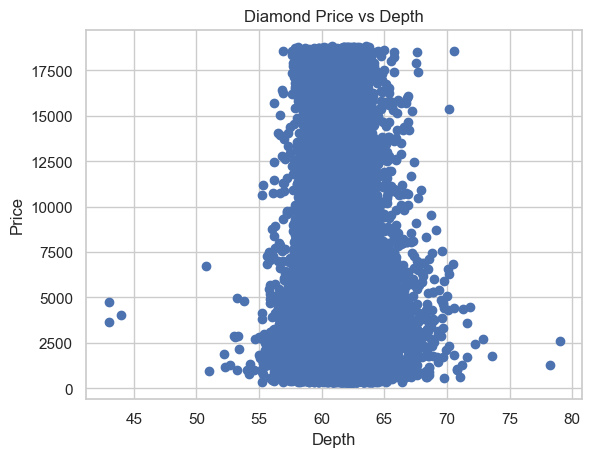

In [219]:
carat = df['depth']
price = df['price']

# Create scatter plot
plt.scatter(carat, price)
plt.xlabel('Depth')
plt.ylabel('Price')
plt.title('Diamond Price vs Depth')


plt.show()

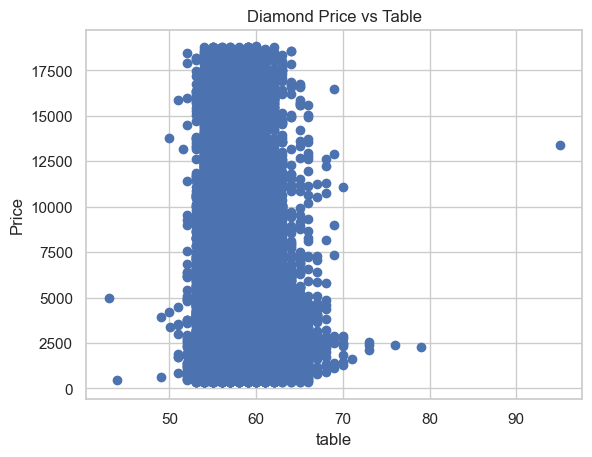

In [220]:
table = df['table']
price = df['price']
# Create scatter plot
plt.scatter(table, price)
plt.xlabel('table')
plt.ylabel('Price')
plt.title('Diamond Price vs Table')
plt.show()

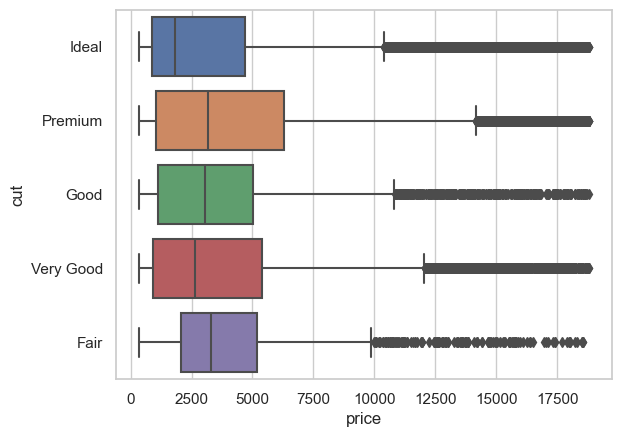

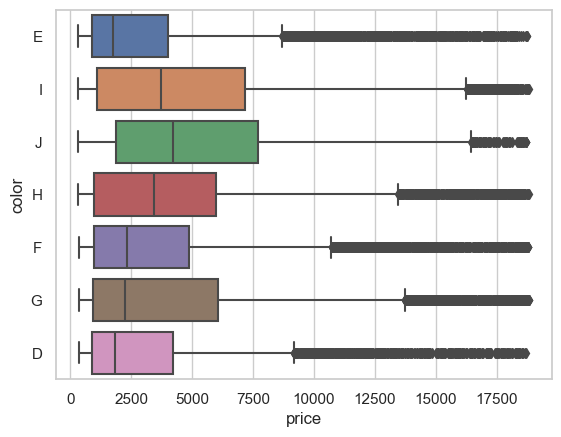

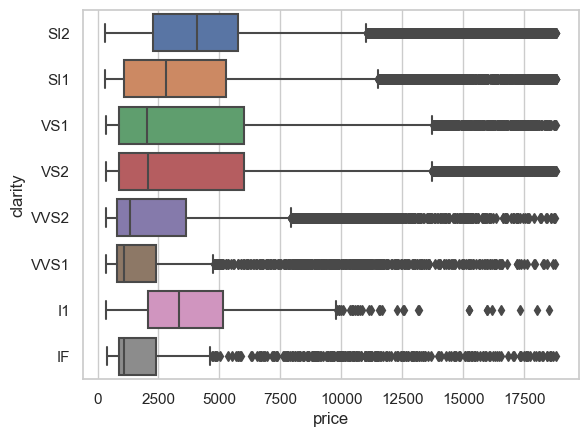

In [221]:
#Box plot for continuos predictors and tager variables:
for col in df.select_dtypes(include='object'):
    sns.boxplot(x=df['price'],y=df[col])
    plt.show()

# Outliars

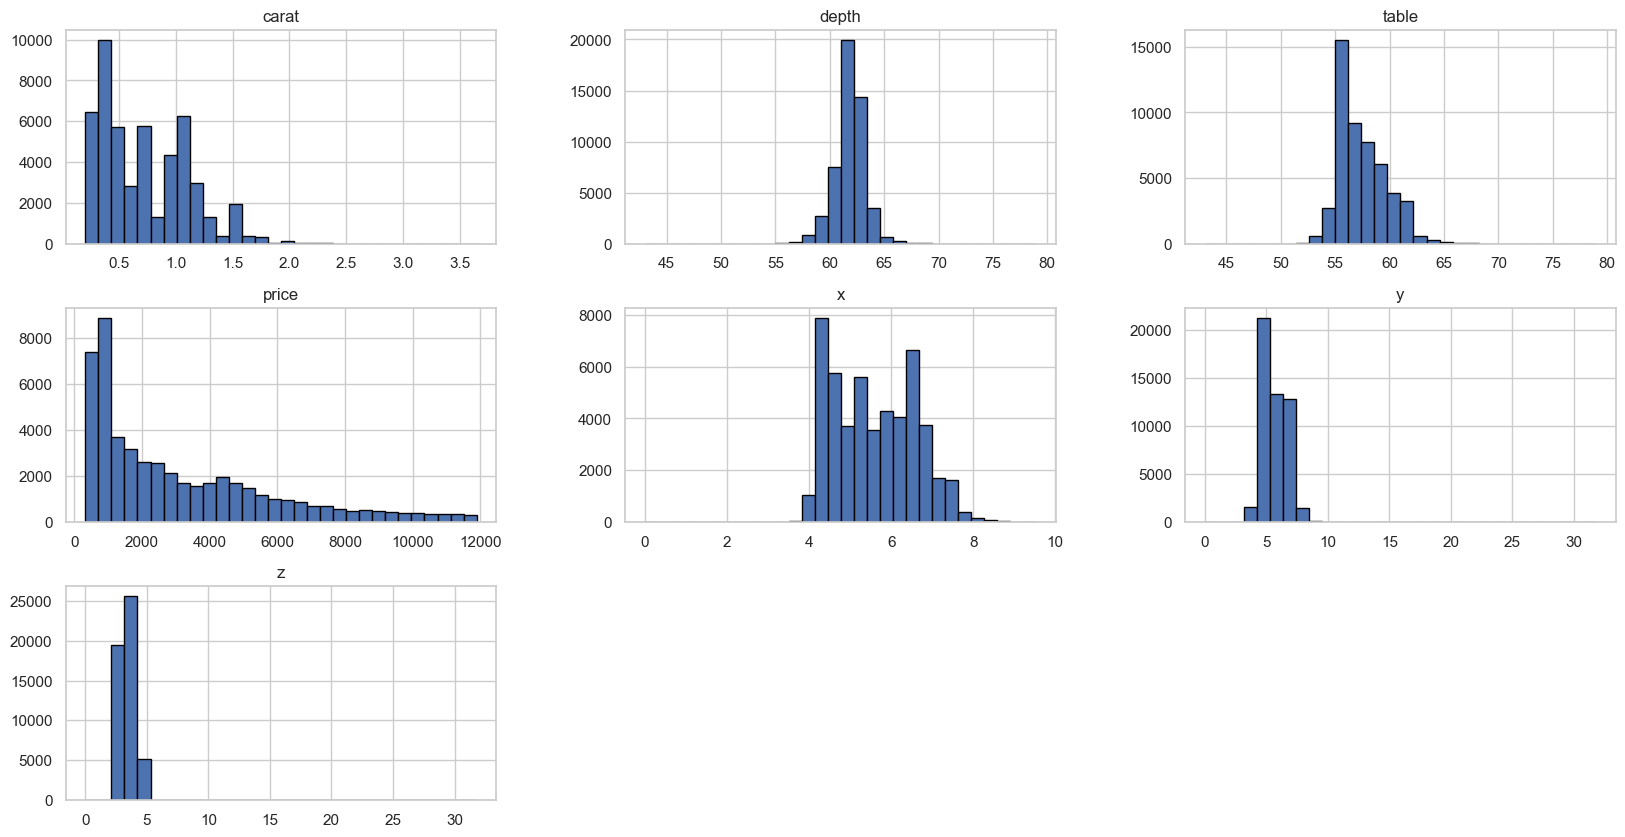

In [230]:
#checking for outliars

df.hist(figsize=(20,10), bins = 30, edgecolor = 'black')
plt.show()

In [231]:
df.mean()

carat       0.723744
depth      61.754445
table      57.422836
price    3161.279982
x           5.583457
y           5.586804
z           3.448622
dtype: float64

In [232]:
df.median()

carat       0.70
depth      61.80
table      57.00
price    2159.00
x           5.59
y           5.58
z           3.43
dtype: float64

We can see price column has outliars.

In [233]:
#Removing outliars

#removing outliers with IQR 

q1 = np.quantile(df.price, 0.25) #1st quantile
q2 = np.quantile(df.price, 0.5) #2nd quantile
q3 = np.quantile(df.price, 0.75) #3rd quantile
IQR = q3 - q1 #Inter - Quartile Range

In [234]:
#setting the fences on our dataset to identify the outliers

lower = q1 - (1.5*IQR) #lower whisker
upper = q3 + (1.5*IQR) #upper whisker

In [235]:
#removal of lower and upper outliers in our data

df = df[~((df.price > upper) | (df.price < lower))]


In [236]:
df.shape

(48887, 10)

We now have 50271 rows and 10 columns

# Missing values

In [237]:
#to see if any columns has empty cells

for column in df:
    print(" Number of empty cells in {} is {} ". format(column, (df[column]=="").sum()))

 Number of empty cells in carat is 0 
 Number of empty cells in cut is 0 
 Number of empty cells in color is 0 
 Number of empty cells in clarity is 0 
 Number of empty cells in depth is 0 
 Number of empty cells in table is 0 
 Number of empty cells in price is 0 
 Number of empty cells in x is 0 
 Number of empty cells in y is 0 
 Number of empty cells in z is 0 


In [238]:
#finding the number of zeros in each column

for column in df:
    print(("Number of zeros in {} is {}".format(column,(df[column]==0).sum())))

Number of zeros in carat is 0
Number of zeros in cut is 0
Number of zeros in color is 0
Number of zeros in clarity is 0
Number of zeros in depth is 0
Number of zeros in table is 0
Number of zeros in price is 0
Number of zeros in x is 4
Number of zeros in y is 3
Number of zeros in z is 11


From the above table also we see that x (length), y(breadth) and z(depth) have zero as these minimum value. So we need to remove these entries with 0s using the code below. Good news is that there are no empty cells.

In [239]:
#dropping all zero values from x,y and z columns
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [240]:
#to check the minimum values of x,y and z
df.describe()

,carat,depth,table,price,x,y,z
count,48876.000000,48876.000000,48876.000000,48876.000000,48876.000000,48876.000000,48876.000000
mean,0.701317,61.758693,57.414115,2937.279278,5.534146,5.537551,3.419110
std,0.361294,1.427573,2.229514,2457.968729,0.958178,0.958113,0.608117
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.380000,61.100000,56.000000,898.000000,4.650000,4.660000,2.860000
50%,0.610000,61.800000,57.000000,2049.000000,5.460000,5.470000,3.360000
75%,1.010000,62.500000,59.000000,4454.250000,6.380000,6.380000,3.960000
max,3.110000,79.000000,79.000000,10309.000000,9.240000,31.800000,31.800000


In [241]:
df.shape

(48876, 10)

We have dropped 11 rows

# Encoding categorical variables using Ordinal Encoding

As we know, in our dataset, the columns cut, clarity and colour have non numerical entries. These features or predictors are called as categorical variables as they put the variable entries in various categories. Like in our example, predictor cut has various categories like Ideal, Premium and Good. To deal with categorical entries, techniques like one hot encoding, dummy coding, label encoding etc can be used. In this implementation, built in methods are not used. Instead, the categories in the categorical variables are replaced by the numeric value as per the category significance. This is shown in the code below-

In [242]:
#Replacing the categorical value colour, cut and clarity without using built in function for categorical data
df=df.replace({'color' : { 'D' : 6, 'E' : 5, 'F' : 4, 'G' : 3, 'H': 2, 'I':1, 'J':0}})
df=df.replace({'cut': {'Ideal':4, 'Premium': 3, 'Very Good':2, 'Good':1, 'Fair':0}})
df=df.replace({'clarity': {"IF": 8, 'VVS1' :7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1':3, 'SI2': 2, 'I1':1, 'I2':0, 'I3':0}})
#Visualize the data frame
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,2,63.3,58.0,335,4.34,4.35,2.75


# Multicollinearity

Checking for multicollinearity among the independent variables and also identifying non contributing independent variable
Before we proceed ahead with the regression, it is very important to check for existence of multicollinearity among the independent variable. That ascertaining whether the change in one variable brings about the change in another independent variable also. If that is the case, we should remove one of the variables from the predictor variable list to make the model more accurate. Moreover, we also need to check if all the independent variables in consideration are actually contributing to the change in dependent variable. Removing any such non-contributing independent variable can aid in reducing the Mean Square Error (MSE).

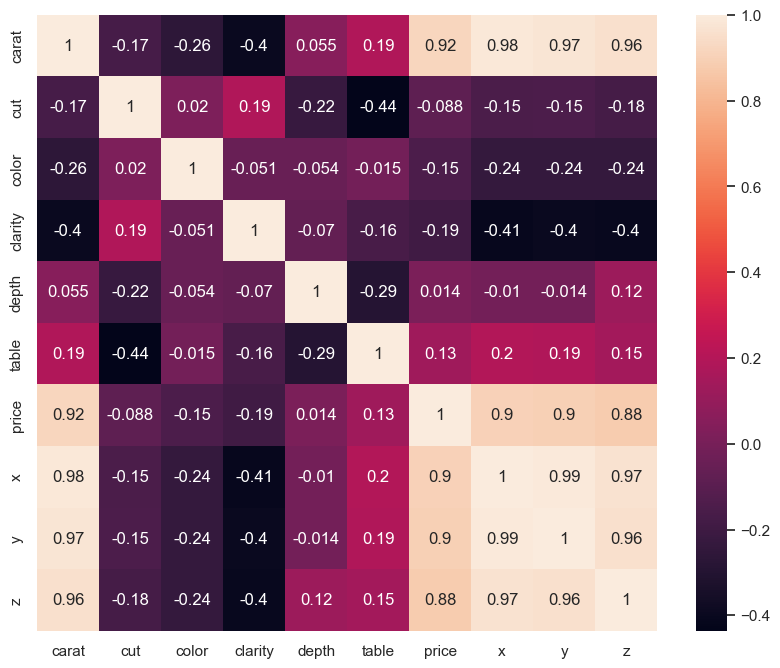

In [243]:
# Create a correlation matrix between every pair of attributes
corr_matrix = df.corr()

# Plot the correlation with seaborn
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [244]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = sm.add_constant(numeric_df)

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif = [vif(numeric_df, i) for i in range(numeric_df.shape[1])]

pd.DataFrame(vif, index=numeric_df.columns, columns=['vif'])

,vif
const,7750.631320
carat,49.603989
cut,1.515308
color,1.323655
clarity,1.820074
depth,1.849730
table,1.595113
price,10.380152
x,97.899765
y,52.978201


In [245]:
def calculate_vif(df):
    # Select only the numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    numeric_df = sm.add_constant(numeric_df)
    # Calculate VIF values
    vif = np.zeros(numeric_df.shape[1])
    for i in range(numeric_df.shape[1]):
        # extracting the label in loop
        y = numeric_df.iloc[:, i]
        # extracting the all features which is not label
        x = numeric_df.iloc[:, np.arange(numeric_df.shape[1]) != i]
        # fit the  model
        model = LinearRegression().fit(x, y)
        # claculate the R_2
        r_squared = model.score(x, y)
        # calculating VIF
        vif[i] = 1 / (1 - r_squared)

    # Create a DataFrame to store the VIF values
    vif_df = pd.DataFrame({
        "features": numeric_df.columns,
        "VIF": vif
    })

    return vif_df

In [246]:
calculate_vif(df)

,features,VIF
0,const,inf
1,carat,49.603989
2,cut,1.515308
3,color,1.323655
4,clarity,1.820074
5,depth,1.849730
6,table,1.595113
7,price,10.380152
8,x,97.899765
9,y,52.978201


Now, we know that variable, x, y and z are length, height and depth respective. Product of these variables can give one single variable “volume”. We can use the following code to implement the same.
Now, we know that variable, x, y and z are length, height and depth respective. Product of these variables can give one single variable “volume”. We can use the following code to implement the same.

In [247]:
#Reducing three variables x, y, z to a single variable
df['volume']= df['x']*df['y']*df["z"] 
#now we can drop x,y,z columns
df=df.drop(['x','y','z'], axis=1)
#Visualizing the data frame to see the change
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,4,5,2,61.5,55.0,326,38.202030
1,0.21,3,5,3,59.8,61.0,326,34.505856
2,0.23,1,5,5,56.9,65.0,327,38.076885
3,0.29,3,1,4,62.4,58.0,334,46.724580
4,0.31,1,0,2,63.3,58.0,335,51.917250


<Axes: >

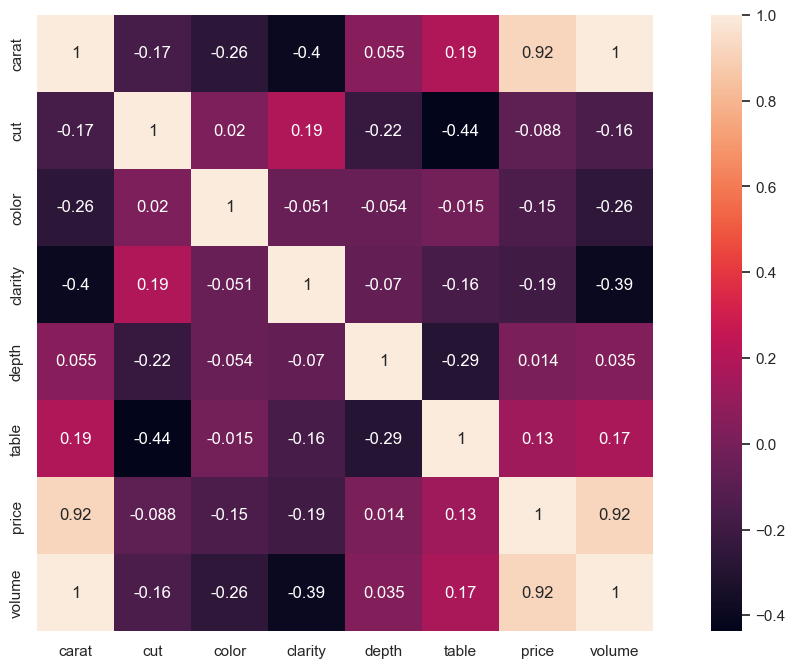

In [248]:
#Plot heat map to see the correlation among the variables
corr = df.corr()
plt.figure(figsize = (15,8)) #To set the figure size
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [249]:
def calculate_vif(df):
    # Select only the numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    numeric_df = sm.add_constant(numeric_df)
    # Calculate VIF values
    vif = np.zeros(numeric_df.shape[1])
    for i in range(numeric_df.shape[1]):
        # extracting the label in loop
        y = numeric_df.iloc[:, i]
        # extracting the all features which is not label
        x = numeric_df.iloc[:, np.arange(numeric_df.shape[1]) != i]
        # fit the  model
        model = LinearRegression().fit(x, y)
        # claculate the R_2
        r_squared = model.score(x, y)
        # calculating VIF
        vif[i] = 1 / (1 - r_squared)

    # Create a DataFrame to store the VIF values
    vif_df = pd.DataFrame({
        "features": numeric_df.columns,
        "VIF": vif
    })

    return vif_df

In [250]:
calculate_vif(df)

,features,VIF
0,const,inf
1,carat,123.507934
2,cut,1.511979
3,color,1.313646
4,clarity,1.806220
5,depth,1.400679
6,table,1.622290
7,price,10.391022
8,volume,113.943253


Since both Carat and volume has high VIF, we'll check for feature significance.

In [251]:
#Define the independent and dependent variables
y= df['price'] #dependent variable is price
x= df.drop(['price'], axis=1)


# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)


#This is the intercept that has to be added to create the model
x = sm.add_constant(x)

# create the model
modelNew = sm.OLS(y, x)

#fit the model
fitted = modelNew.fit() 

#Obtain the results of regression
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 6.556e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:27:33   Log-Likelihood:            -3.9372e+05
No. Observations:               48876   AIC:                         7.875e+05
Df Residuals:                   48868   BIC:                         7.875e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2692.6504    257.098    -10.473      0.000   -3196.565   -2188.736
carat       6081.6409    102.473     59.349      0.000    5880.793    6282.489
cut           84.0653      3.756     22.382      0.000      76.704      91.427
color        202.7830      2.153     94.185      0.000     198.563     207.003
clarity      342.8323      2.347    146.077      0.000     338.232     347.432
depth        -19.7194      2.858     -6.899      0.000     -25.321     -14.117
table         -9.5733      1.970     -4.859      0.000     -13.435      -5.712
volume         6.9095      0.630     10.966      0.000       5.674       8.144
==============================================================================
Omnibus:                     8315.547   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           162637.103
Skew:                           0.215   Prob(JB):                         0.00
Kurtosis:                      11.926   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see both carat and volume are have high VIF and both are significant features. Since both enlighten us about the physical attributes of the diamond, I'm dropping volume.

In [252]:
df = df.drop('volume', axis=1)

In [253]:
df.head() 

,carat,cut,color,clarity,depth,table,price
0,0.23,4,5,2,61.5,55.0,326
1,0.21,3,5,3,59.8,61.0,326
2,0.23,1,5,5,56.9,65.0,327
3,0.29,3,1,4,62.4,58.0,334
4,0.31,1,0,2,63.3,58.0,335


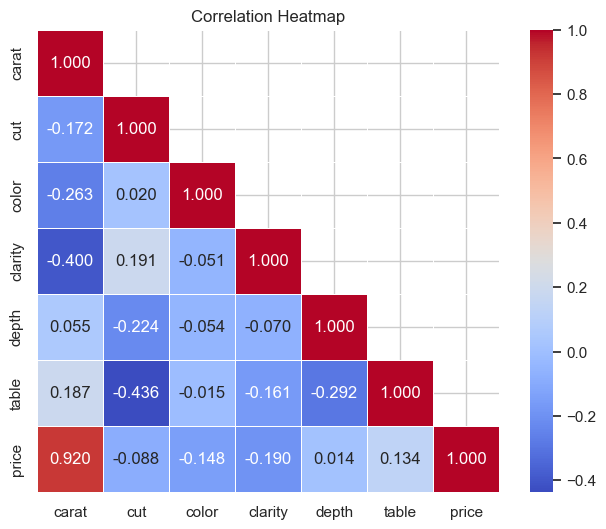

In [254]:
# plotting heatmap
def plot_heatmap():
    from seaborn import heatmap
    
    # define correlation matrix
    corr_df = df.corr(method='pearson')
    df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))
    
    # plot heatmap
    plt.figure(figsize=(8, 6))
    heatmap(data=df_lt, annot=True, square=True, cbar=True, linewidths=.5, fmt='.3f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

plot_heatmap()

# Linear Regression using Stats Model

In [255]:
#Define the independent and dependent variables
y= df['price'] #dependent variable is price
x= df.drop(['price'], axis=1)

In [256]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [257]:
#This is the intercept that has to be added to create the model
x = sm.add_constant(x)

# create the model
modelNew = sm.OLS(y, x)

#fit the model
fitted = modelNew.fit() 

#Obtain the results of regression
fitted.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 7.628e+04
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:27:35   Log-Likelihood:            -3.9378e+05
No. Observations:               48876   AIC:                         7.876e+05
Df Residuals:                   48869   BIC:                         7.876e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2052.2526    250.682     -8.187      0.000   -2543.593   -1560.912
carat       7198.7384     11.093    648.919      0.000    7176.995    7220.482
cut           84.9300      3.760     22.590      0.000      77.561      92.299
color        202.8534      2.156     94.104      0.000     198.628     207.078
clarity      342.9475      2.350    145.949      0.000     338.342     347.553
depth        -26.8373      2.787     -9.630      0.000     -32.300     -21.375
table        -13.0262      1.947     -6.690      0.000     -16.843      -9.210
==============================================================================
Omnibus:                     8350.324   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165427.722
Skew:                           0.213   Prob(JB):                         0.00
Kurtosis:                      12.003   Cond. No.                     6.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observation

We can see :

the P value of our F statistic, and conclude that our overall model is significant.

The P valus of our t statistic of every feature, and conclude that all our features are significant.

# Inference

By observing the beta coefficients, We can say that, carat affects price the most and there's an increase in price of about 7586 with an additional increase in carat.

In [258]:
df['price'].max()

10309

In [259]:
max_price = df['price'].max()
max_price_rows = df[df['price'] == max_price]
print(max_price_rows)


       carat  cut  color  clarity  depth  table  price
22254   1.59    2      1        4   61.1   58.6  10309
22255   1.71    4      0        5   62.4   56.0  10309


The highest priced diamond has the above features

# Scaling the data

In [260]:
#Built-in function to standardize the data
from sklearn.preprocessing import StandardScaler
cols=['carat', 'depth','table'] #identifying the columns to be standardized
for i in cols:
#fit the training data with standard scale
    scale = StandardScaler().fit(df[[i]])
# standardize the numerical predictor columns in the dataframe
    df[i] = scale.transform(df[[i]])

In [261]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,-1.304537,4,5,2,-0.181214,-1.082810,326
1,-1.359894,3,5,3,-1.372058,1.608387,326
2,-1.304537,1,5,5,-3.403499,3.402518,327
3,-1.138466,3,1,4,0.449233,0.262788,334
4,-1.083109,1,0,2,1.079680,0.262788,335


In [262]:
df.value_counts()

carat      cut  color  clarity  depth      table      price
-1.083109  4    3      8         0.239084  -1.531343  891      4
                6      4        -0.391363  -1.082810  734      4
                                                      942      4
-1.110787  4    5      4        -0.181214  -1.082810  844      4
-1.083109  1    5      3         1.149730  -1.082810  544      4
                                                              ..
-0.723288  3    2      2        -2.352754   1.159854  759      1
                                -1.722307   1.159854  759      1
                                -1.512158   1.159854  759      1
                       4        -0.321313   0.262788  810      1
 6.666882  0    0      1         2.900972  -0.185744  9823     1
Length: 48221, dtype: int64

# Linear Regression (Machine Learning)

In [298]:
#Define the independent and dependent variables
y= df['price'] #dependent variable is price
x= df.drop(['price'], axis=1)

In [299]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [300]:
model = LinearRegression() #Create a linear regression model
model.fit(x_train,y_train) #Fit the data

LinearRegression()

In [301]:
#Predict the value of y based on the test data
y_pred =  model.predict(x_test)

In [302]:
#Obtain the r_squared value

print("r_squared value is ", model.score(x,y))

r_squared value is  0.9035231261184484


In [303]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Calculate the mean squared error (MSE)
MSE = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
RMSE_LR = np.sqrt(MSE)

# Calculate MAPE for the training data
MAPE_LR = mean_absolute_percentage_error(y_test, y_pred)

# Printing results

print("Mean Absolute Percentage Error", MAPE_LR)
print("Mean Square Error is", MSE)
print("Root Mean Square Error is", RMSE_LR)


Mean Absolute Percentage Error 0.318390477503421
Mean Square Error is 579548.3668282888
Root Mean Square Error is 761.2807411384375


In [304]:
def calculate_adjusted_r_squared(y_true, y_pred, n_features):
    n = len(y_true)
    residuals = y_true - y_pred
    rss = np.sum(residuals**2)
    tss = np.sum((y_true - np.mean(y_true))**2)
    r_squared = 1 - (rss / tss)
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - n_features - 1)
    return adjusted_r_squared

# Calculate the adjusted R-squared value
n_features = x_test.shape[1]  # number of features in the test data
adj_r2 = calculate_adjusted_r_squared(y_test, y_pred, n_features)

print("Adjusted R-squared value is", adj_r2)

Adjusted R-squared value is 0.9044305532508622


# KNN

In [270]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [271]:
# Create a KNN regressor and fit the training data
k = 3 # number of nearest neighbors to consider
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(x_test)


r2 = r2_score(y_test, y_pred)
# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
RMSE_KNN = np.sqrt(mse)

# Evaluate the model performance using mean absolute percentage error
MAPE_KNN = mean_absolute_percentage_error(y_test, y_pred)


#Obtain the r_squared value
print("R-squared value is", r2)
print("Root Mean Square Error is", RMSE_KNN)
print("MSE:", mse)
print("MAPE:", MAPE_KNN)

R-squared value is 0.9513423592186461
Root Mean Square Error is 540.4420469172478
MSE: 292077.60607610474
MAPE: 0.14347672133513967


In [272]:
def calculate_adjusted_r_squared(y_true, y_pred, n_features):
    n = len(y_true)
    residuals = y_true - y_pred
    rss = np.sum(residuals**2)
    tss = np.sum((y_true - np.mean(y_true))**2)
    r_squared = 1 - (rss / tss)
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - n_features - 1)
    return adjusted_r_squared

# Calculate the adjusted R-squared value
n_features = x_test.shape[1]  # number of features in the test data
adj_r2 = calculate_adjusted_r_squared(y_test, y_pred, n_features)

print("Adjusted R-squared value is", adj_r2)

Adjusted R-squared value is 0.9513124742923805


# Decision tree

In [273]:
from sklearn.tree import DecisionTreeRegressor

In [274]:
# Create a decision tree regressor model and fit the training data
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = dt.predict(x_test)

# Evaluate the model performance using mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RMSE_DT = np.sqrt(mse)
MAPE_DT = mean_absolute_percentage_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", RMSE_DT)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Mean Absolute Percentage Error (MAPE):", MAPE_DT)

Root Mean Squared Error (RMSE): 453.1094988388231
Mean Squared Error: 205308.2179379694
R-squared Score: 0.9657974000400337
Mean Absolute Percentage Error (MAPE): 0.1000798112645289


In [275]:
def calculate_adjusted_r_squared(y_true, y_pred, n_features):
    n = len(y_true)
    residuals = y_true - y_pred
    rss = np.sum(residuals**2)
    tss = np.sum((y_true - np.mean(y_true))**2)
    r_squared = 1 - (rss / tss)
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - n_features - 1)
    return adjusted_r_squared

n_features = x_test.shape[1]  # number of features in the test data
adj_r2 = calculate_adjusted_r_squared(y_test, y_pred, n_features)
print("Adjusted R-squared value is", adj_r2)

Adjusted R-squared value is 0.9657763932225744


In [276]:
n_features = x_test.shape[1]  # number of features in the test data
adj_r2 = calculate_adjusted_r_squared(y_test, y_pred, n_features)
print("Adjusted R-squared value is", adj_r2)

Adjusted R-squared value is 0.9657763932225744


# random forest

In [179]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have your feature matrix X and target vector y

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a random forest regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(x_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 148759.51480054262


In [180]:
MAPE_RF = mean_absolute_percentage_error(y_test, y_pred)


print("Mean Absolute Percentage Error (MAPE):", MAPE_RF)

Mean Absolute Percentage Error (MAPE): 0.08293886377612154


In [181]:
def calculate_adjusted_r_squared(y_true, y_pred, n_features):
    n = len(y_true)
    residuals = y_true - y_pred
    rss = np.sum(residuals**2)
    tss = np.sum((y_true - np.mean(y_true))**2)
    r_squared = 1 - (rss / tss)
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - n_features - 1)
    return adjusted_r_squared


RMSE_RF = np.sqrt(mse)

# Calculate the number of features
n_features = x_test.shape[1]

# Calculate the adjusted R-squared value
adj_r2 = calculate_adjusted_r_squared(y_test, y_pred, n_features)

# Print the results
print("Root Mean Squared Error (RMSE):", RMSE_RF)
print("Adjusted R-squared value:", adj_r2)

Root Mean Squared Error (RMSE): 385.6935503745721
Adjusted R-squared value: 0.9802426972783118


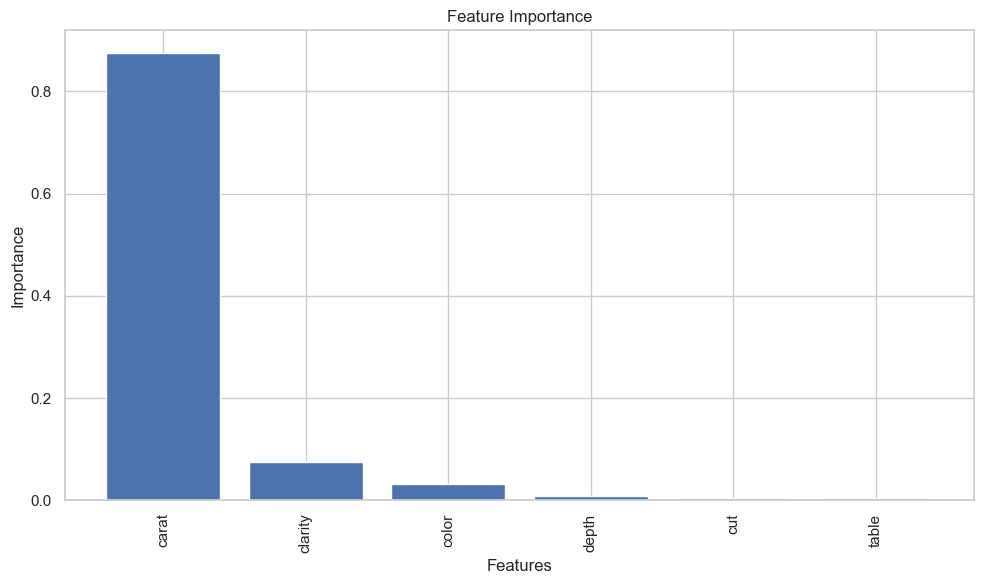

In [99]:
# Split the data into independent variables (X) and the target variable (y)
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table']]
y = df['price']

# Initialize the regression model (Random Forest Regressor in this example)
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Sort feature importance in descending order
indices = np.argsort(importance)[::-1]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importance[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


We can see carat is the most important feature and table is least.

# Observations

In [182]:

print("MAPE for LR is", MAPE_LR)

print("MAPE for KNN is", MAPE_KNN)

print("MAPE for Decision Tree is", MAPE_DT)

print("MAPE for random forest is", MAPE_RF)

print("We see that Random forest gives us the least MAPE")

MAPE for LR is 0.361915944949783
MAPE for KNN is 0.14663102606043185
MAPE for Decision Tree is 0.10177430302495383
MAPE for random forest is 0.08293886377612154
We see that Random forest gives us the least MAPE


In [183]:
print("RMSE for LR is", RMSE_LR)

print("RMSE for KNN is", RMSE_KNN)

print("RMSE for Decision Tree is", RMSE_DT)

print("RMSE for random forest is", RMSE_RF)

print("We see that Random forest gives us the least RMSE")

RMSE for LR is 853.9593580486535
RMSE for KNN is 616.1917526389414
RMSE for Decision Tree is 499.4347992774509
RMSE for random forest is 385.6935503745721
We see that Random forest gives us the least RMSE


In [184]:
Metrics_df = pd.DataFrame({
    "Model": ["Linear Regression","KNN",'Decision Tree',"Random Forest"],
    "RMSE": [RMSE_LR, RMSE_KNN, RMSE_DT, RMSE_RF],
    "MAPE": [MAPE_LR, MAPE_KNN, MAPE_DT, MAPE_RF]
})

In [185]:
Metrics_df

,Model,RMSE,MAPE
0,Linear Regression,853.959358,0.361916
1,KNN,616.191753,0.146631
2,Decision Tree,499.434799,0.101774
3,Random Forest,385.693550,0.082939


We can see Random forest gives us the best result, then Decision tree, then KNN and lastly Linear Regression.